# **Exercises No. 2**

**1. SIFT (Scale-Invariant Feature Transform)**

In [12]:
pip install opencv-contrib-python

In [3]:
from google.colab import files

Saving ryuwho.jpg to ryuwho (1).jpg


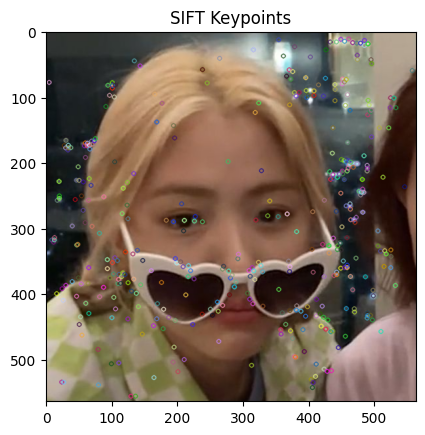

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Upload the image
uploaded = files.upload()

# Load the image (extract the filename from uploaded dict)
filename = list(uploaded.keys())[0]
image = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

**2. SURF (Speeded-Up Robust Features)**

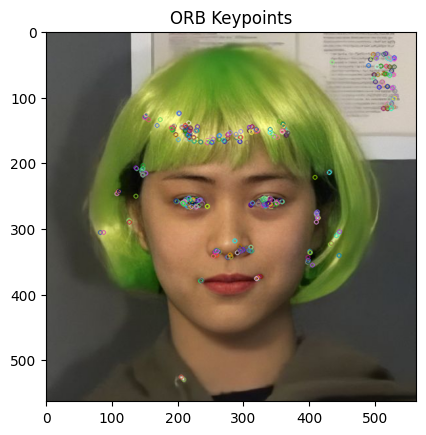

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('ryugreen.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

**3. ORB (Oriented FAST and Rotated BRIEF)**

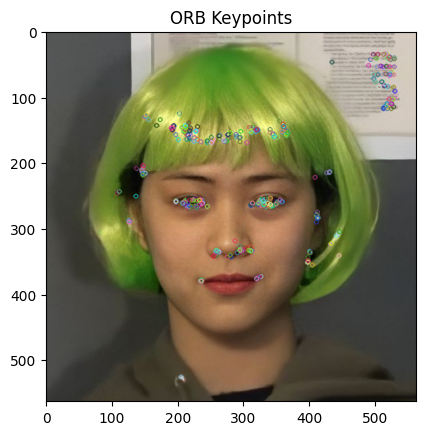

In [16]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('ryugreen.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

**4. Feature Matching**

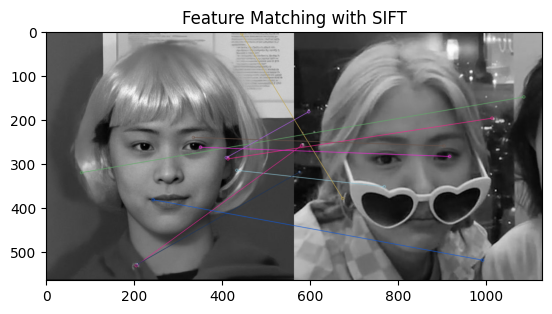

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
image1 = cv2.imread('ryugreen.jpg', 0)
image2 = cv2.imread('ryuwho.jpg', 0)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Initialize the matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

**5. Applications of Feature Matching**

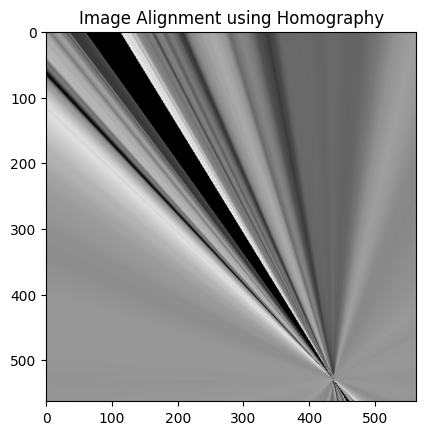

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load two images in grayscale
image1 = cv2.imread('ryugreen.jpg', 0)
image2 = cv2.imread('ryuwho.jpg', 0)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors using SIFT
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Find homography matrix
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp one image to align with the other
h, w = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

# Display the result
plt.imshow(result, cmap='gray')
plt.title('Image Alignment using Homography')
plt.show()


**6. Combining Feature Extraction Methods**

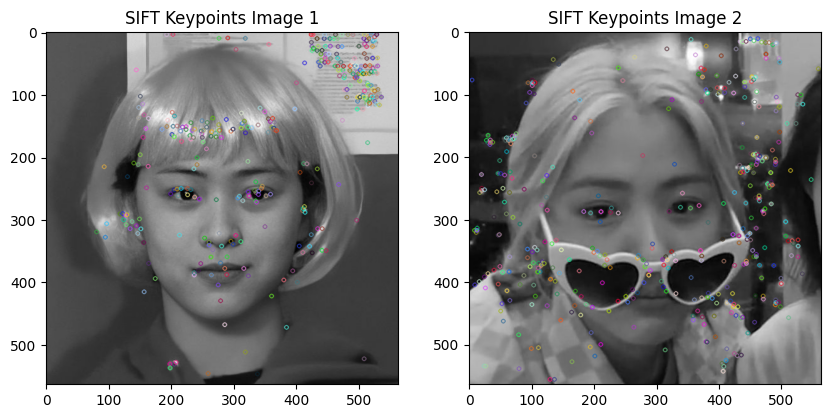

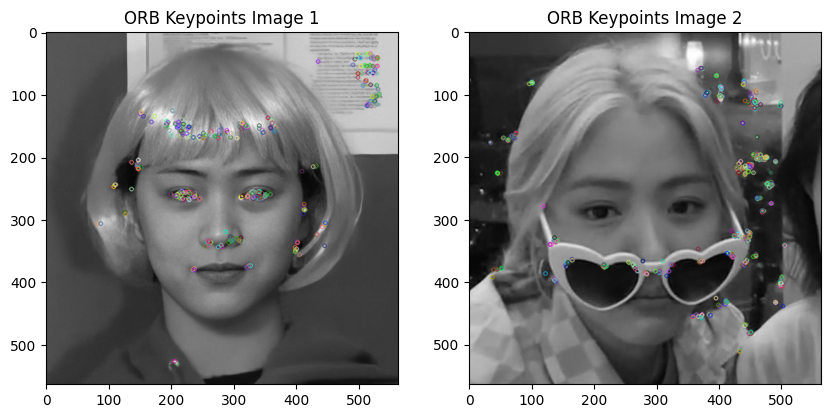

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load two images in grayscale
image1 = cv2.imread('ryugreen.jpg', 0)
image2 = cv2.imread('ryuwho.jpg', 0)

# SIFT detector
sift = cv2.SIFT_create()

keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

# ORB detector
orb = cv2.ORB_create()

# ORB detects keypoints and computes descriptors separately
keypoints1_orb = orb.detect(image1, None)
keypoints1_orb, descriptors1_orb = orb.compute(image1, keypoints1_orb)

keypoints2_orb = orb.detect(image2, None)
keypoints2_orb, descriptors2_orb = orb.compute(image2, keypoints2_orb)

# Draw SIFT keypoints on image1 and image2
image1_sift = cv2.drawKeypoints(image1, keypoints1_sift, None)
image2_sift = cv2.drawKeypoints(image2, keypoints2_sift, None)

# Draw ORB keypoints on image1 and image2
image1_orb = cv2.drawKeypoints(image1, keypoints1_orb, None)
image2_orb = cv2.drawKeypoints(image2, keypoints2_orb, None)

# Display SIFT keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1_sift, cmap='gray')
plt.title('SIFT Keypoints Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2_sift, cmap='gray')
plt.title('SIFT Keypoints Image 2')

plt.show()

# Display ORB keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1_orb, cmap='gray')
plt.title('ORB Keypoints Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2_orb, cmap='gray')
plt.title('ORB Keypoints Image 2')

plt.show()